Mount Google Drive (optional)

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Lab 4 : Neural Network**

In *lab 4*, you need to finish:

1. Basic Part (65%):
  Implement a deep neural network from scratch

  > * Section 1: Neural network implementation
    >> * Part 1: Linear layer
    >> * Part 2: Activation function layer
    >> * Part 3: Build model

  > * Section 2: Loss function
    >> * Part 1: Binary cross-entropy loss (BCE)
    >> * Part 2: Categorical cross-entropy loss (CCE)
    >> * Part 3: Mean square error (MSE)
  > * Section 3: Training and prediction
    >> * Part 1: Training function & batch function
    >> * Part 2: Regression
    >> * Part 3: Binary classification


2. Advanced Part (30%): Multi class classification
3. Report (5%)


## **Important  notice**

* Please **do not** change the code outside this code bracket in the basic part.
  ```
  ### START CODE HERE ###
  ...
  ### END CODE HERE ###
  ```

* Please **do not** import any other packages in both basic and advanced part

* Please **do not** change the random seed **np.random.seed(1)**.


## Import Packages


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.metrics import f1_score
from matplotlib.animation import FuncAnimation

outputs = {}

### Common Notation
  * $C$: number of classes
  * $n$: number of samples
  * $f^{[l]}$: the dimension of outputs in layer $l$, but $f^{[0]}$ is the input dimension
  * $Z^{[l]} = A^{[l-1]}W^{[l]} + b^{[l]}$
      * $Z^{[l]}$: the output of layer $l$ in the shape $(n, f^{[l]})$
      * $A^{[l]}$: the activation of $Z^{[l]}$ in the shape $(n, f^{[l]})$, but $A^{[0]}$ is input $X$
      * $W^{[l]}$: the weight in layer $l$ in the shape $(f^{[l-1]}, f^{[l]})$
      * $b^{[l]}$: the bias in layer $l$ in the shape $(1, f^{[l]})$


# **Basic Part (65%)**
In the Basic Part, you will implement a neural network framework capable of handling both regression, binary classification and multi-class classification tasks.

**Note:**
After implementing each class/function, test it with the provided input variables to verify its correctness. Save the results in the **outputs** dictionary. (The code for testing and saving results is already provided.)
## Section 1: Neural network implementation
* Part 1: Linear layer
> * Step 1: Linear Initialize parameters
> * Step 2: Linear forward
> * Step 3: Linear backward
> * Step 4: Linear update parameters
* Part 2: Activation function layer
> * Step 1: Activation forward
> * Step 2: Activation backward
* Part 3: Build model
> * Step 1: Model Initialize parameters
> * Step 2: Model forward
> * Step 3: Model backward
> * Step 4: Model update parameters

## Section 2: Loss function
* Part 1: Binary cross-entropy loss (BCE)
* Part 2: Categorical cross-entropy loss (CCE)
* Part 3: Mean square error (MSE)

## Section 3: Training and prediction
* Part 1: Training function & batch function
* Part 2: Regression
* Part 3: Binary classification


## **Section 1: Neural network implementation(30%)**
To implement a neural network, you need to complete 3 classes: **Dense**, **Activation**, and **Model**.
The process of training a deep neural network is composed of 3 steps: *forward propagation*, *backward propagation*, and *update*.

## Part 1: Linear layer (10%)
Dense layer (fully-connected layer) performs linear transformation:

$Z = AW + b$, where W is weight matrix and b is bias vector.

> ### Step 1: Initialize parameters (0%)
 * You don't need to write this part.
 * W is randomly initialized using uniform distribution within $[\text\{-limit\}, \text\{limit\}]$, where $\text\{limit\} = \sqrt{\frac{6}{\text\{fanin\} + \text\{fanout\}}}$ (fanin: number of input features, fanout: number of output features)
 * b is initialized to 0

> ### Step 2: Linear forward (4%)
* Compute Z using matrix multiplication and addition

> ### Step 3: Linear backward (4%)
* Use backpropagation to compute gradients of loss function with respect to parameters
* For layer l: $Z^{[l]} = A^{[l-1]} W^{[l]} + b^{[l]}$ (followed by activation)
* Given $dZ^{[l]}$ (gradient of loss with respect to Z), we need to compute three gradients:
  * $dW^{[l]}$: gradient of loss with respect to weights
  * $db^{[l]}$: gradient of loss with respect to bias
  * $dA^{[l-1]}$: gradient of loss with respect to previous layer output

> Formulas:
$$ dW^{[l]} = \frac{1}{n} A^{[l-1] T} dZ^{[l]} $$
$$ db^{[l]} = \frac{1}{n} \sum_{i = 1}^{n} dZ_i^{[l]} $$
$$ dA^{[l-1]} = dZ^{[l]} W^{[l] T} $$

> ### Step 4: Linear update parameters (2%)
* Update parameters using gradient descent:
$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} $$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} $$

In [21]:
class Dense():
    def __init__(self, n_x, n_y, seed=1):
        self.n_x = n_x
        self.n_y = n_y
        self.seed = seed
        self.initialize_parameters()

    def initialize_parameters(self):
        """
        Argument:
        self.n_x -- size of the input layer
        self.n_y -- size of the output layer
        self.parameters -- python dictionary containing your parameters:
                           W -- weight matrix of shape (n_x, n_y)
                           b -- bias vector of shape (1, n_y)
        """
        sd = np.sqrt(6.0 / (self.n_x + self.n_y))
        np.random.seed(self.seed)
        W = np.random.uniform(-sd, sd, (self.n_y, self.n_x)).T      # the transpose here is just for the code to be compatible with the old codes
        b = np.zeros((1, self.n_y))

        assert(W.shape == (self.n_x, self.n_y))
        assert(b.shape == (1, self.n_y))

        self.parameters = {"W": W, "b": b}

    def forward(self, A):
        """
        Implement the linear part of a layer's forward propagation.

        Arguments:
        A -- activations from previous layer (or input data) with the shape (n, f^[l-1])
        self.cache -- a python tuple containing "A", "W" and "b" ; stored for computing the backward pass efficiently

        Returns:
        Z -- the input of the activation function, also called pre-activation parameter with the shape (n, f^[l])
        """

        # GRADED FUNCTION: linear_forward
        ### START CODE HERE ###
        Z = np.dot(A, self.parameters["W"]) + self.parameters["b"]
        self.cache = (A, self.parameters["W"], self.parameters["b"])
        ### END CODE HERE ###

        assert(Z.shape == (A.shape[0], self.parameters["W"].shape[1]))

        return Z

    def backward(self, dZ):
        """
        Implement the linear portion of backward propagation for a single layer (layer l)

        Arguments:
        dZ -- Gradient of the loss with respect to the linear output (of current layer l), same shape as Z
        self.cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer
        self.dW -- Gradient of the loss with respect to W (current layer l), same shape as W
        self.db -- Gradient of the loss with respect to b (current layer l), same shape as b

        Returns:
        dA_prev -- Gradient of the loss with respect to the activation (of the previous layer l-1), same shape as A_prev

        """
        A_prev, W, b = self.cache
        m = A_prev.shape[0]

        # GRADED FUNCTION: linear_backward
        ### START CODE HERE ###
        self.dW = (1/m) * np.dot(A_prev.T, dZ)
        self.db = (1/m) * np.sum(dZ, axis=0, keepdims=True)
        dA_prev = np.dot(dZ, W.T)
        ### END CODE HERE ###

        assert (dA_prev.shape == A_prev.shape)
        assert (self.dW.shape == self.parameters["W"].shape)
        assert (self.db.shape == self.parameters["b"].shape)

        return dA_prev

    def update(self, learning_rate):
        """
        Update parameters using gradient descent

        Arguments:
        learning rate -- step size
        """

        # GRADED FUNCTION: linear_update_parameters
        ### START CODE HERE ###
        self.parameters["W"] = self.parameters["W"] - learning_rate * self.dW
        self.parameters["b"] = self.parameters["b"] - learning_rate * self.db
        ### END CODE HERE ###

### Test your **Dense class**

In [22]:
# Initial parameters
dense = Dense(3, 1)
print("W = " + str(dense.parameters["W"]))
print("b = " + str(dense.parameters["b"]))

# Linear forward
A, W, b = np.array([[0., 1., 2.], [0.5, 1.5, 2.5], [1., 2., 3.]]), np.array([[0.1], [0.2], [0.3]]), np.array([[1.1]])
dense = Dense(3, 1)
dense.parameters = {"W": W, "b": b}
Z = dense.forward(A)
print("Z = " + str(Z))

A, W, b = np.array([[-0.80,-0.45,-1.11],[-1.65,-2.36,1.14],[-1.02,0.64,-0.86]]), np.array([[0.3], [0.3], [0.1]]), np.array([[-6.2]])
dense = Dense(3, 1)
dense.parameters = {"W": W, "b": b}
Z = dense.forward(A)
outputs["dense_forward"] = (Z, dense.cache)

# Linear backward
dZ, linear_cache = np.array([[1.5, 0.5], [2.5, 1.]]), (np.array([[0.5], [1]]), np.array([[2., 1.0]]), np.array([[0.5, 1.]]))
dense = Dense(1, 2)
dense.cache = linear_cache
dA_prev = dense.backward(dZ)
print ("dA_prev = " + str(dA_prev))
print ("dW = " + str(dense.dW))
print ("db = " + str(dense.db))

dZ, linear_cache = np.array([[0.52,0.34],[0.76,0.89]]), (np.array([[0.42], [0.68]]), np.array([[0.35, 0.89]]), np.array([[0.12, 0.76]]))
dense = Dense(1, 2)
dense.cache = linear_cache
dA_prev = dense.backward(dZ)
outputs["dense_backward"] = (dA_prev, dense.dW, dense.db)

# Linear update parameters
np.random.seed(1)
dense = Dense(1, 2)
dense.parameters = {"W": np.array([[1.0, 2.0]]), "b": np.array([[0.5, 0.5]])}
dense.dW = np.array([[0.5, -0.5]])
dense.db = np.array([[1.5, -1.5]])
dense.update(1.0)
print("W = " + str(dense.parameters["W"]))
print("b = " + str(dense.parameters["b"]))

np.random.seed(1)
dense = Dense(3, 4)
parameters, grads = {"W1": np.random.rand(3, 4), "b1": np.random.rand(1,4)}, {"dW1": np.random.rand(3, 4), "db1": np.random.rand(1,4)}
dense.parameters = {"W": parameters["W1"], "b": parameters["b1"]}
dense.dW = grads["dW1"]
dense.db = grads["db1"]
dense.update(0.1)
outputs["dense_update_parameters"] = {"W": dense.parameters["W"], "b": dense.parameters["b"]}

W = [[-0.20325375]
 [ 0.53968259]
 [-1.22446471]]
b = [[0.]]
Z = [[1.9]
 [2.2]
 [2.5]]
dA_prev = [[3.5]
 [6. ]]
dW = [[1.625 0.625]]
db = [[2.   0.75]]
W = [[0.5 2.5]]
b = [[-1.  2.]]


Expected output:
<table>
  <tr>
    <td>W: </td>
    <td>[[-0.20325375]  [0.53968259 [-1.22446471]]</td>
  </tr>
  <tr>
    <td>b: </td>
    <td>[[0.]]</td>
  </tr>
  <tr>
    <td>Z: </td>
    <td>[[1.9] [2.2] [2.5]]</td>
  </tr>
  <tr>
    <td>dA_prev: </td>
    <td>[[3.5] [6.0]]</td>
  </tr>
  <tr>
    <td>dW: </td>
    <td>[[1.625 0.625]]</td>
  </tr>
  <tr>
    <td>db: </td>
    <td>[[2.0 0.75]]</td>
  </tr>
  <tr>
    <td>W: </td>
    <td>[[0.5 2.5]]</td>
  </tr>
  <tr>
    <td>b: </td>
    <td>[[-1.  2.]]</td>
  </tr>
</table>

## Part 2: Activation function layer (10%)

Implement forward and backward propagation for activation function layers, including Sigmoid, Softmax, and ReLU.

> ### Step 1: Forward Propagation (5%)
 Implement the following activation functions:
>> #### a) Sigmoid
- Use the numerically stable version to prevent exponential overflow:
  $$\sigma(Z) = \begin{cases}
    \frac{1}{1+e^{-Z}},& \text{if } Z \geq 0\\
    \frac{e^{Z}}{1+e^{Z}}, & \text{otherwise}
  \end{cases}$$

>> #### b) ReLU
- Simple implementation:
  $$RELU(Z) = \max(Z, 0)$$

>> #### c) Softmax
- Implement using the numerically stable version:
  $$\sigma(\vec{Z})_i = \frac{e^{Z_i-b}}{\sum_{j=1}^{C} e^{Z_j-b}}$$
  where $b = \max_{j=1}^{C} Z_j$

>> #### d) Linear
- You don't need to implement this part

> ### Requirements
- Each function should return:
  1. Activation value "a"
  2. Cache containing "z" for backward propagation

> ### Step 2: Backward Propagation (5%)
Implement backward functions for:
- Sigmoid
- ReLU
- Softmax
- linear

> ### General Form
$$dZ^{[l]} = dA^{[l]} * g'(Z^{[l]})$$
where $g(.)$ is the activation function

> ### Specific Implementations

>> #### a) Sigmoid Backward
$$\sigma'(Z^{[l]}) = \sigma(Z^{[l]}) (1 - \sigma(Z^{[l]}))$$
Use numerically stable sigmoid

>> #### b) ReLU Backward
$$g'(Z^{[l]}) = \begin{cases}
    1,& \text{if } Z^{[l]} > 0\\
    0,              & \text{otherwise}
\end{cases}$$

>> #### c) Softmax Backward
For the special case of Softmax combined with Categorical Cross-Entropy loss:
$$dZ^{[l]} = s - y$$
where $s$ is softmax output, $y$ is true label (one-hot vector)

Note: This is a simplified form specific to Softmax + CCE loss combination.

>> #### d) linear Backward
You don't need to implement this part

> ### Note
For softmax, use the normalized exponential function to prevent overflow, but use the simplified gradient equation for backwards propagation.

In [23]:
class Activation():
    def __init__(self, activation_function, loss_function):
        self.activation_function = activation_function
        self.loss_function = loss_function
        self.cache = None

    def forward(self, Z):
        if self.activation_function == "sigmoid":
            """
            Implements the sigmoid activation in numpy

            Arguments:
            Z -- numpy array of any shape
            self.cache -- stores Z as well, useful during backpropagation

            Returns:
            A -- output of sigmoid(z), same shape as Z
            """

            # GRADED FUNCTION: sigmoid_forward
            ### START CODE HERE ###
            A = np.where(Z>=0, 1/(1+np.exp(-Z)), np.exp(Z)/(1+np.exp(Z)))
            self.cache = Z.copy()
            ### END CODE HERE ###

            return A
        elif self.activation_function == "relu":
            """
            Implement the RELU function in numpy
            Arguments:
            Z -- numpy array of any shape
            self.cache -- stores Z as well, useful during backpropagation
            Returns:
            A -- output of relu(z), same shape as Z

            """

            # GRADED FUNCTION: relu_forward
            ### START CODE HERE ###
            A = np.maximum(Z, 0)
            self.cache = Z.copy()
            ### END CODE HERE ###

            assert(A.shape == Z.shape)

            return A
        elif self.activation_function == "softmax":
            """
            Implements the softmax activation in numpy

            Arguments:
            Z -- np.array with shape (n, C)
            self.cache -- stores Z as well, useful during backpropagation

            Returns:
            A -- output of softmax(z), same shape as Z
            """

            # GRADED FUNCTION: softmax_forward
            ### START CODE HERE ###
            A = np.exp(Z - np.max(Z,axis=1,keepdims=True)) / np.sum( np.exp(Z - np.max(Z,axis=1,keepdims=True)) ,axis=1,keepdims=True)
            self.cache = Z.copy()
            ### END CODE HERE ###

            return A
        elif self.activation_function == "linear":
            """
            Linear activation (returns Z directly).
            """
            self.cache = Z.copy()
            return Z

        else:
            raise ValueError(f"Unsupported activation function: {self.activation_function}")


    def backward(self, dA=None, Y=None):
        if self.activation_function == "sigmoid":
            """
            Implement the backward propagation for a single SIGMOID unit.
            Arguments:
            dA -- post-activation gradient, of any shape
            self.cache -- 'Z' where we store for computing backward propagation efficiently
            Returns:
            dZ -- Gradient of the loss with respect to Z
            """

            # GRADED FUNCTION: sigmoid_backward
            ### START CODE HERE ###
            Z = self.cache
            A = np.where(Z>=0, 1/(1+np.exp(-Z)), np.exp(Z)/(1+np.exp(Z)))
            dZ = dA*A*(1-A)
            ### END CODE HERE ###

            assert (dZ.shape == Z.shape)

            return dZ

        elif self.activation_function == "relu":
            """
            Implement the backward propagation for a single RELU unit.
            Arguments:
            dA -- post-activation gradient, of any shape
            self.cache -- 'Z' where we store for computing backward propagation efficiently
            Returns:
            dZ -- Gradient of the loss with respect to Z
            """

            # GRADED FUNCTION: relu_backward
            ### START CODE HERE ###
            Z = self.cache
            dZ = dA*(Z>0).astype(float)
            ### END CODE HERE ###

            assert (dZ.shape == Z.shape)

            return dZ

        elif self.activation_function == "softmax":
            """
            Implement the backward propagation for a [SOFTMAX->CCE LOSS] unit.
            Arguments:
            Y -- true "label" vector (one hot vector, for example: [1,0,0] represents rock, [0,1,0] represents paper, [0,0,1] represents scissors
                                      in a Rock-Paper-Scissors, shape: (n, C)
            self.cache -- 'Z' where we store for computing backward propagation efficiently
            Returns:
            dZ -- Gradient of the cost with respect to Z
            """

            # GRADED FUNCTION: softmax_backward
            ### START CODE HERE ###
            Z = self.cache
            s = np.exp(Z-np.max(Z,axis=1,keepdims=True)) / np.sum( np.exp(Z-np.max(Z,axis=1,keepdims=True)), axis=1,keepdims=True)
            dZ = s - Y
            ### END CODE HERE ###

            assert (dZ.shape == self.cache.shape)

            return dZ

        elif self.activation_function == "linear":
            """
            Backward propagation for linear activation.
            """
            return dA

        else:
            raise ValueError(f"Unsupported activation function: {self.activation_function}")

### Test your **Activation class**

In [24]:
# Activation forward
Z = np.array([[-5], [-1], [0], [1], [5]])

sigmoid = Activation("sigmoid", 'cross_entropy')
A = sigmoid.forward(Z)
print("Sigmoid: A = " + str(A))
A = sigmoid.forward(np.array([[0.23], [-0.67], [0.45], [0.89], [-0.10]]))
outputs["sigmoid"] = (A, sigmoid.cache)

relu = Activation("relu", 'cross_entropy')
A = relu.forward(Z)
print("ReLU: A = " + str(A))
A = relu.forward(np.array([[-0.34], [-0.76], [0.21], [-0.98], [0.54]]))
outputs["relu"] = (A, relu.cache)

Z = np.array([[1, 2, 3, 4],[0, 1, 0, 0],[-2, -1, 0, 1]])
softmax = Activation("softmax", 'cross_entropy')
A = softmax.forward(Z)
print("Softmax: A = \n" + str(A))
A = softmax.forward(np.array([[0.12, -0.56, 0.78, -0.34], [0.45, 0.67, -0.89, 0.23], [-0.14, 0.50, -0.76, 0.98]]))
outputs["softmax"] = (A, softmax.cache)

linear = Activation("linear", 'mse')
A = linear.forward(Z)
print("Linear: A = \n" + str(A))
A = linear.forward(np.array([[0.12, -0.56, 0.78, -0.34], [0.45, 0.67, -0.89, 0.23], [-0.14, 0.50, -0.76, 0.98]]))
outputs["linear"] = (A, Z)  # For linear activation, cache is just Z

# Activation backward
dA, cache = np.array([[-2], [-1.37], [-1.14], [-2], [-3.72]]), np.array([[0], [1], [2], [0], [1]])
sigmoid = Activation("sigmoid", 'cross_entropy')
sigmoid.cache = cache
dZ = sigmoid.backward(dA=dA)
print("Sigmoid: dZ = "+ str(dZ))
dA, cache = np.array([[9.73], [-7.56], [8.34], [-4.12], [6.89]]), np.array([[-5.45], [3.68], [-2.32], [4.51], [-9.27]])
sigmoid.cache = cache
outputs["sigmoid_backward"] = sigmoid.backward(dA=dA)

relu = Activation("relu", 'cross_entropy')
dA, cache = np.array([[-2., 1.7 ], [-1.37, 2.], [-1.14, 3.72]]), np.array([[-2, 1], [-1, 0], [2, 1]])
relu.cache = cache
dZ = relu.backward(dA=dA)
print("ReLU: dZ = "+ str(dZ))
dA, cache = np.array([[7.24, -3.58], [8.93, 6.45], [-2.11, 9.87]]), np.array([[-4.76, 5.34], [1.98, -7.22], [3.67, -8.56]])
relu.cache = cache
outputs["relu_backward"] = relu.backward(dA=dA)

Y, cache = np.array([[1, 0, 0],[0, 1, 0],[0, 0, 1]]), np.array([[-2, 1, 0],[-1, 0, 1],[-2, -2, 2]])
softmax = Activation("softmax", 'cross_entropy')
softmax.cache = cache
dZ = softmax.backward(Y=Y)
print("Softmax: dZ = " + str(dZ))
Y, cache = np.array([[0, 1, 0], [0, 1, 0], [1, 0, 0]]), np.array([[-9.45, 7.32, 3.58], [5.61, -8.27, 6.49], [1.23, -4.56, 7.84]])
softmax.cache = cache
outputs["softmax_backward"] = softmax.backward(Y=Y)

linear = Activation("linear", 'mse')
dA = np.array([[1.2, -0.5, 0.8, -0.3], [0.4, 0.6, -0.9, 0.2], [-0.1, 0.5, -0.7, 0.9]])
dZ = linear.backward(dA=dA)
print("Linear: dZ = \n" + str(dZ))
outputs["linear_backward"] = dZ

Sigmoid: A = [[0.00669285]
 [0.26894142]
 [0.5       ]
 [0.73105858]
 [0.99330715]]
ReLU: A = [[0]
 [0]
 [0]
 [1]
 [5]]
Softmax: A = 
[[0.0320586  0.08714432 0.23688282 0.64391426]
 [0.1748777  0.47536689 0.1748777  0.1748777 ]
 [0.0320586  0.08714432 0.23688282 0.64391426]]
Linear: A = 
[[ 1  2  3  4]
 [ 0  1  0  0]
 [-2 -1  0  1]]
Sigmoid: dZ = [[-0.5       ]
 [-0.26935835]
 [-0.11969269]
 [-0.5       ]
 [-0.73139639]]
ReLU: dZ = [[-0.    1.7 ]
 [-0.    0.  ]
 [-1.14  3.72]]
Softmax: dZ = [[-0.96488097  0.70538451  0.25949646]
 [ 0.09003057 -0.75527153  0.66524096]
 [ 0.01766842  0.01766842 -0.03533684]]
Linear: dZ = 
[[ 1.2 -0.5  0.8 -0.3]
 [ 0.4  0.6 -0.9  0.2]
 [-0.1  0.5 -0.7  0.9]]


Expected output:
<table>
  <tr>
    <td>Sigmoid: A</td>
    <td>[[0.00669285] [0.26894142] [0.5] [0.73105858] [0.99330715]]</td>
  </tr>
  <tr>
    <td>ReLU: A</td>
    <td>[[0] [0] [0] [1] [5]]</td>
  </tr>
  <tr>
    <td>Softmax: A</td>
    <td>
      [[0.0320586 0.08714432 0.23688282 0.64391426]
       [0.1748777 0.47536689 0.1748777 0.1748777]
       [0.0320586 0.08714432 0.23688282 0.64391426]]
    </td>
  </tr>
  <tr>
    <td>Linear: A</td>
    <td>
      [[1 2 3 4]
       [0 1 0 0]
       [-2 -1 0 1]]
    </td>
  </tr>
  <tr>
    <td>(with Sigmoid) dZ</td>
    <td>[[-0.5] [-0.26935835] [-0.11969269] [-0.5] [-0.73139639]]</td>
  </tr>
  <tr>
    <td>(with ReLU) dZ</td>
    <td>[[0 1.7] [0 0] [-1.14 3.72]]</td>
  </tr>
  <tr>
    <td>(with Softmax) dZ</td>
    <td>
      [[-0.96488097 0.70538451 0.25949646]
       [0.09003057 -0.75527153 0.66524096]
       [0.01766842 0.01766842 -0.03533684]]
    </td>
  </tr>
  <tr>
    <td>(with Linear) dZ</td>
    <td>
      [[1.2 -0.5 0.8 -0.3]
       [0.4 0.6 -0.9 0.2]
       [-0.1 0.5 -0.7 0.9]]
    </td>
  </tr>
</table>

## Part 3: Model (10%)

Use the functions that you had previously written to implement the complete neural network model, including initialization, forward propagation, backward propagation, and parameter updates.

> ### Step 1: Model Initialization (0%)
Initialize the model by creating linear and activation function layers.

>> #### Requirements:
- Store linear layers in a list called `linear`
- Store activation function layers in a list called `activation`
- Use iteration number as seed for each Dense layer initialization

>> #### Note:
A linear-activation pair counts as a single layer in the neural network.

> ### Step 2: Forward Propagation (4%)
Implement the model's forward pass by calling each layer's forward function sequentially.

>> #### Process:
1. For layers 1 to N-1: [LINEAR -> ACTIVATION]
2. Final layer: LINEAR -> SIGMOID (binary) or SOFTMAX (multi-class)

>> #### Note:
For binary classification, use one output node with sigmoid activation. For K-class classification, use K output nodes with softmax activation.

> ### Step 3: Backward Propagation (4%)
Implement the model's backward pass by calling each layer's backward function in reverse order.

>> #### Process:
1. Initialize backpropagation:
   - Regression:
     $$dAL = AL - Y$$
   - Binary classification:
     $$dAL = - (\frac{Y}{AL + \epsilon} - \frac{1 - Y}{1 - AL + \epsilon})$$
     where $\epsilon = 10^{-5}$ to prevent division by zero
   - Multi-class classification:
     Use `softmax_backward` function
2. Backpropagate through layers L to 1

>> #### Note:
Use cached values from the forward pass in each layer's backward function.

> ### Step 4: Parameter Update (2%)
Update model parameters using gradient descent.

>> #### Update Rule:
For each layer $l = 1, 2, ..., L$:
$$W^{[l]} = W^{[l]} - \alpha \cdot dW^{[l]}$$
$$b^{[l]} = b^{[l]} - \alpha \cdot db^{[l]}$$
where $\alpha$ is the learning rate

This revised structure provides a clear, step-by-step breakdown of the model implementation process, mirroring the format used in Part 2. It covers all the essential components while maintaining a concise and logical flow.

In [25]:
class Model():
    def __init__(self, units, activation_functions, loss_function):
        self.units = units
        self.activation_functions = activation_functions
        self.loss_function = loss_function
        self.initialize_parameters()

    def initialize_parameters(self):
        """
        Initialize layers of the neural network

        Arguments:
            self.units -- array defining network structure (e.g., [4,4,1]):
                - Input layer: 4 nodes
                - Hidden layer: 4 nodes
                - Output layer: 1 node
            self.activation_functions -- activation function for each layer (e.g., ["relu","sigmoid"]):
                - First layer uses ReLU
                - Second layer uses Sigmoid
            self.loss_function -- loss function type: "cross_entropy" or "mse"
        """
        self.linear = []        # Store all Dense layers (weights & biases)
        self.activation = []    # Store all activation function layers

        for i in range(len(self.units)-1):
            dense = Dense(self.units[i], self.units[i+1], i)
            self.linear.append(dense)

        for i in range(len(self.activation_functions)):
            self.activation.append(Activation(self.activation_functions[i], self.loss_function))

    def forward(self, X):
        """
        Forward propagation through the network

        Arguments:
        X -- input data: shape (n, f)
        Returns:
        A -- model output:
            - For binary classification: probability (0-1)
            - For multi-class: probability distribution across classes
            - For regression: predicted values
        """
        A = X

        # GRADED FUNCTION: model_forward
        ### START CODE HERE ###
        for i in range(len(self.linear)):
            Z = self.linear[i].forward(A)
            A = self.activation[i].forward(Z)
        ### END CODE HERE ###

        return A

    def backward(self, AL=None, Y=None):
        """
        Backward propagation to compute gradients

        Arguments:
            AL -- model output from forward propagation:
                - For binary: probability (n,1)
                - For multi-class: probabilities (n,C)
            Y -- true labels:
                - For binary: 0/1 labels (n,1)
                - For multi-class: one-hot vectors (n,C)
                - For regression: true values (n,1)

        Returns:
            dA_prev -- gradients for previous layer's activation
        """

        L = len(self.linear)
        C = Y.shape[1]

        # assertions
        warning = 'Warning: only the following 3 combinations are allowed! \n \
                    1. binary classification: sigmoid + cross_entropy \n \
                    2. multi-class classification: softmax + cross_entropy \n \
                    3. regression: linear + mse'
        assert self.loss_function in ["cross_entropy", "mse"], "you're using undefined loss function!"
        if self.loss_function == "cross_entropy":
            if Y.shape[1] == 1:  # binary classification
                assert self.activation_functions[-1] == 'sigmoid', warning
            else:  # multi-class classification
                assert self.activation_functions[-1] == 'softmax', warning
                assert self.units[-1] == Y.shape[1], f"you should set last dim to {Y.shape[1]}(the number of classes) in multi-class classification!"
        elif self.loss_function == "mse":
            assert self.activation_functions[-1] == 'linear', warning
            assert self.units[-1] == Y.shape[1], "output dimension mismatch for regression!"

        # GRADED FUNCTION: model_backward
        ### START CODE HERE ###
        if self.activation_functions[-1] == "linear":
            # Initializing the backpropagation
            dAL = AL-Y
            # Lth layer (LINEAR) gradients. Inputs: "dAL". Outputs: "dA_prev"
            dZ = dAL
            dA_prev = self.linear[-1].backward(dZ)

        elif self.activation_functions[-1] == "sigmoid":
            # Initializing the backpropagation
            dAL = -( (Y/(AL+1e-5))-((1-Y)/(1-AL+1e-5)) )

            # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "dAL". Outputs: "dA_prev"
            dZ = self.activation[-1].backward(dA=dAL)
            dA_prev = self.linear[-1].backward(dZ)

        elif self.activation_functions[-1] == "softmax":
            # Initializing the backpropagation
            dZ = self.activation[-1].backward(Y=Y)

            # Lth layer (LINEAR) gradients. Inputs: "dZ". Outputs: "dA_prev"
            dA_prev = self.linear[-1].backward(dZ)

        # Loop from l=L-2 to l=0
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "dA_prev". Outputs: "dA_prev"
        for l in reversed(range(L-1)):
            dZ = self.activation[l].backward(dA=dA_prev)
            dA_prev = self.linear[l].backward(dZ)
        ### END CODE HERE ###

        return dA_prev

    def update(self, learning_rate):
        """
        Arguments:
        learning_rate -- step size
        """

        L = len(self.linear)

        # GRADED FUNCTION: model_update_parameters
        ### START CODE HERE ###
        for l in range(L):
            self.linear[l].update(learning_rate)
        ### END CODE HERE ###

### Test your **Model class**

In [26]:
# Model initialize parameters
model = Model([3, 3, 1], ["relu", "sigmoid"], "cross_entropy")
print("W1: ", model.linear[0].parameters["W"], "\nb1: ", model.linear[0].parameters["b"])
print("W2: ", model.linear[1].parameters["W"], "\nb2: ", model.linear[1].parameters["b"])

# Model forward
A_prev, W, b = np.array([[0.1, 1.1, 2.9],[-1.2, 0.2, -2.5],[1.9, 2.3, 3.7]]), np.array([[0.1], [0.2], [0.3]]), np.array([[-0.5]])
model = Model([3, 1], ["sigmoid"], "cross_entropy")
model.linear[0].parameters = {"W": W, "b": b}
A = model.forward(A_prev)
print("With sigmoid: A = " + str(A))
A_prev, W, b = np.array([[4.35, -5.67], [-7.89, 8.12]]), np.array([[-3.54], [-2.34]]), np.array([[0.8]])
model = Model([2, 1], ["sigmoid"], "cross_entropy")
model.linear[0].parameters = {"W": W, "b": b}
A = model.forward(A_prev)
outputs["model_forward_sigmoid"] = (A, (model.linear[0].cache, model.activation[0].cache))

A_prev, W, b = np.array([[0.1, 1.1, 2.9],[-1.2, 0.2, -2.5],[1.9, 2.3, 3.7]]), np.array([[0.1], [0.2], [0.3]]), np.array([[-0.5]])
model = Model([3, 1], ["relu"], "cross_entropy")
model.linear[0].parameters = {"W": W, "b": b}
A = model.forward(A_prev)
print("With ReLU: A = " + str(A))
A_prev, W, b = np.array([[7.23, -4.56], [5.67, -8.90]]), np.array([[-9.12], [3.45]]), np.array([[0.25]])
model = Model([2, 1], ["relu"], "cross_entropy")
model.linear[0].parameters = {"W": W, "b": b}
A = model.forward(A_prev)
outputs["model_forward_relu"] = (A, (model.linear[0].cache, model.activation[0].cache))

A_prev, W, b = np.array([[0.1, 1.1, 2.9],[-1.2, 0.2, -2.5],[1.9, 2.3, 3.7]]), np.array([[0.1, -0.1, -0.1],[0.2, -0.2, 0.],[0.3, -0.3, 0.1]]), np.array([[-0.5, 0.5, 0.1]])
model = Model([3, 3], ["softmax"], "cross_entropy")
model.linear[0].parameters = {"W": W, "b": b}
A = model.forward(A_prev)
print("With softmax: A = \n" + str(A))
A_prev, W, b = np.array([[-5.12, 4.56, 7.89], [8.34, -6.78, 2.45], [3.21, -4.67, 5.98]]), np.array([[6.23, -7.85, 4.56], [-3.21, 9.87, -2.34], [1.23, -5.67, 8.90]]), np.array([[4.12, -6.54, 7.89]])
model = Model([3, 3], ["softmax"], "cross_entropy")
model.linear[0].parameters = {"W": W, "b": b}
A = model.forward(A_prev)
outputs["model_forward_softmax"] = (A, (model.linear[0].cache, model.activation[0].cache))

# binary classification
X = np.array([[0, -2, 0.5], [1, -1, 0.5], [2, 0, 0.5]])
model = Model([3, 3, 1], ["relu", "sigmoid"], "cross_entropy")
AL = model.forward(X)
print("AL = " + str(AL))
print("Length of layers list = " + str(len(model.linear)))

# multi-class classification
X = np.array([[0, -2, 0.5], [1, -1, 0.5], [2, 0, 0.5]])
model = Model([3, 3, 10], ["relu", "softmax"], "cross_entropy")
AL = model.forward(X)
print("AL = " + str(AL))
print("Length of layers list = " + str(len(model.linear)))

W1:  [[ 0.09762701  0.08976637 -0.12482558]
 [ 0.43037873 -0.1526904   0.783546  ]
 [ 0.20552675  0.29178823  0.92732552]] 
b1:  [[0. 0. 0.]]
W2:  [[-0.20325375]
 [ 0.53968259]
 [-1.22446471]] 
b2:  [[0.]]
With sigmoid: A = [[0.64565631]
 [0.20915937]
 [0.77902611]]
With ReLU: A = [[0.6 ]
 [0.  ]
 [1.26]]
With softmax: A = 
[[0.47535001 0.14317267 0.38147732]
 [0.05272708 0.75380161 0.19347131]
 [0.68692136 0.05526942 0.25780921]]
AL = [[0.56058713]
 [0.55220559]
 [0.46331713]]
Length of layers list = 2
AL = [[0.11637212 0.08186754 0.0924809  0.09675205 0.12819411 0.09664001
  0.08448599 0.09067641 0.1294968  0.08303407]
 [0.11413265 0.08432761 0.09365443 0.09736489 0.12404237 0.09726785
  0.08664355 0.09207969 0.12512634 0.08536063]
 [0.09750771 0.07419482 0.08444682 0.10943351 0.09669465 0.11116299
  0.08734059 0.12452515 0.13002144 0.08467232]]
Length of layers list = 2


Expected output:
<table>
  <tr>
    <td>W1:</td>
    <td>[[ 0.09762701 0.08976637 -0.12482558] [ 0.43037873 -0.1526904 0.783546 ] [ 0.20552675 0.29178823 0.92732552]]</td>
  </tr>
  <tr>
    <td>b1:</td>
    <td>[[0. 0. 0.]]</td>
  </tr>
  <tr>
    <td>W2:</td>
    <td>[[-0.20325375] [ 0.53968259] [-1.22446471]]</td>
  </tr>
  <tr>
    <td>b2:</td>
    <td>[[0.]]</td>
  </tr>
  <tr>
    <td>With Sigmoid:</td>
    <td>A = [[0.64565631] [0.20915937] [0.77902611]]</td>
  </tr>
  <tr>
    <td>With ReLU:</td>
    <td>A = [[0.6 ] [0. ] [1.26]]</td>
  </tr>
  <tr>
    <td>With Softmax:</td>
    <td>A = [[0.47535001 0.14317267 0.38147732] [0.05272708 0.75380161 0.19347131] [0.68692136 0.05526942 0.25780921]]</td>
  </tr>
  <tr>
    <td>AL:</td>
    <td>[[0.56058713] [0.55220559] [0.46331713]]</td>
  </tr>
  <tr>
    <td>Length of layers list:</td>
    <td>2</td>
  </tr>
  <tr>
    <td>AL:</td>
    <td>[[0.11637212 0.08186754 0.0924809  0.09675205 0.12819411 0.09664001 0.08448599 0.09067641 0.1294968  0.08303407]
         [0.11413265 0.08432761 0.09365443 0.09736489 0.12404237 0.09726785 0.08664355 0.09207969 0.12512634 0.08536063]
         [0.09750771 0.07419482 0.08444682 0.10943351 0.09669465 0.11116299 0.08734059 0.12452515 0.13002144 0.08467232]]</td>
  </tr>
  <tr>
    <td>Length of layers list:</td>
    <td>2</td>
  </tr>
</table>

In [27]:
# Model backward
AL, Y, linear_activation_cache = np.array([[0.1], [0.2], [0.5], [0.9], [1.0]]), np.array([[0], [0], [1], [1], [1]]), (((np.array([[-2, 2], [-1, 1], [0, 0], [1, -1], [2, -2]]), np.array([[2.0], [1.0]]), np.array([[0.5]])), np.array([[0], [1], [2], [0], [1]])))
model = Model([2, 1], ["sigmoid"], "cross_entropy")
model.linear[0].cache = linear_activation_cache[0]
model.activation[0].cache = linear_activation_cache[1]
dA_prev = model.backward(AL=AL, Y=Y)
print ("sigmoid:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(model.linear[0].dW))
print ("db = " + str(model.linear[0].db) + "\n")
AL, Y, linear_activation_cache = np.array([[0.35], [0.93], [0.23], [0.72], [0.90]]), np.array([[1], [0], [1], [0], [1]]), (((np.array([[-1, 2], [1, 3], [2, 0], [1, -4], [3, -2]]), np.array([[1.7], [3.2]]), np.array([[0.25]])), np.array([[2], [1], [2], [0], [0]])))
model = Model([2, 1], ["sigmoid"], "cross_entropy")
model.linear[0].cache = linear_activation_cache[0]
model.activation[0].cache = linear_activation_cache[1]
dA_prev = model.backward(AL=AL, Y=Y)
outputs["model_backward_sigmoid"] = (dA_prev, model.linear[0].dW, model.linear[0].db)

X, Y = np.array([[-2, 2], [-1, 1], [0, 0], [1, -1], [2, -2]]), np.array([[0], [1], [1], [1], [1]])
model = Model([2, 2, 1], ["relu", "sigmoid"], "cross_entropy")
AL = model.forward(X)
dA_prev = model.backward(AL=AL, Y=Y)
print ("relu:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(model.linear[0].dW))
print ("db = " + str(model.linear[0].db) + "\n")
X, Y = np.array([[4.56, -3.21], [-7.85, 6.34], [2.45, -8.90], [5.67, 3.12], [-4.78, 7.89]]), np.array([[1], [1], [0], [1], [0]])
model = Model([2, 2, 1], ["relu", "sigmoid"], "cross_entropy")
AL = model.forward(X)
dA_prev = model.backward(AL=AL, Y=Y)
outputs["model_backward_relu"] = (dA_prev, model.linear[0].dW, model.linear[0].db)

# binary classification
X, Y = np.array([[0, -2, 0.5], [1, -1, 0.5], [2, 0, 0.5]]), np.array([[1], [0], [0]])
model = Model([3, 3, 1], ["relu", "sigmoid"], "cross_entropy")
AL = model.forward(X)
dA_prev = model.backward(AL=AL, Y=Y)
print("Binary classification")
print("dW1 = "+ str(model.linear[0].dW))
print("db1 = "+ str(model.linear[0].db))
print("dA_prev = "+ str(dA_prev) +"\n")

# multi-class classification
X, Y = np.array([[0, -2, 0.5], [1, -1, 0.5], [2, 0, 0.5]]), np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
model = Model([3, 3, 3], ["relu", "softmax"], "cross_entropy")
AL = model.forward(X)
dA_prev = model.backward(AL=AL, Y=Y)
print("Multi-class classification")
print("dW1 = "+ str(model.linear[0].dW))
print("db1 = "+ str(model.linear[0].db))
print("dA_prev = "+ str(dA_prev) +"\n")

# regression - mse
X, Y = np.array([[0, -2, 0.5], [1, -1, 0.5], [2, 0, 0.5]]), np.array([[2.5], [1.8], [3.2]])
model = Model([3, 3, 1], ["relu", "linear"], "mse")
AL = model.forward(X)
dA_prev = model.backward(AL=AL, Y=Y)
print("Regression")
print("dW1 = "+ str(model.linear[0].dW))
print("db1 = "+ str(model.linear[0].db))
print("dA_prev = "+ str(dA_prev) +"\n")

sigmoid:
dA_prev = [[ 0.55554938  0.27777469]
 [ 0.49152369  0.24576184]
 [-0.41996594 -0.20998297]
 [-0.55554938 -0.27777469]
 [-0.39321993 -0.19660997]]
dW = [[-0.29446117]
 [ 0.29446117]]
db = [[-0.03216622]]

relu:
dA_prev = [[-0.01269296 -0.05595562]
 [ 0.01470136  0.06480946]
 [ 0.          0.        ]
 [-0.07496777 -0.0327431 ]
 [-0.07151883 -0.03123674]]
dW = [[ 0.0178719  -0.17321413]
 [-0.0178719   0.17321413]]
db = [[ 0.00335943 -0.11638953]]

Binary classification
dW1 = [[-0.06277946  0.26602938 -0.37820327]
 [ 0.          0.05875647  0.        ]
 [-0.01569486  0.05181823 -0.09455082]]
db1 = [[-0.03138973  0.10363646 -0.18910163]]
dA_prev = [[-0.02128713  0.03620889 -0.06919444]
 [ 0.02675119 -0.04550313  0.08695554]
 [ 0.08406585 -0.52321654 -0.47247201]]

Multi-class classification
dW1 = [[ 0.16593371  0.33171007 -0.32297709]
 [ 0.          0.15006987  0.        ]
 [ 0.04148343  0.04541005 -0.08074427]]
db1 = [[ 0.08296685  0.0908201  -0.16148854]]
dA_prev = [[-0.04735391

Expected output:
<table>
  <tr>
    <th colspan="2">Sigmoid</th>
  </tr>
  <tr>
    <td>dA_prev:</td>
    <td>[[ 0.55554938  0.27777469] [ 0.49152369  0.24576184] [-0.41996594 -0.20998297] [-0.55554938 -0.27777469] [-0.39321993 -0.19660997]]</td>
  </tr>
  <tr>
    <td>dW:</td>
    <td>[[-0.29446117] [ 0.29446117]]</td>
  </tr>
  <tr>
    <td>db:</td>
    <td>[[-0.03216622]]</td>
  </tr>
  <tr>
    <th colspan="2">ReLU</th>
  </tr>
  <tr>
    <td>dA_prev:</td>
    <td>[[-0.01269296 -0.05595562] [ 0.01470136  0.06480946] [ 0.  0. ] [-0.07496777 -0.0327431 ] [-0.07151883 -0.03123674]]</td>
  </tr>
  <tr>
    <td>dW:</td>
    <td>[[ 0.0178719  -0.17321413] [-0.0178719   0.17321413]]</td>
  </tr>
  <tr>
    <td>db:</td>
    <td>[[ 0.00335943 -0.11638953]]</td>
  </tr>
  <tr>
    <th colspan="2">Binary Classification</th>
  </tr>
  <tr>
    <td>dW1:</td>
    <td>[[-0.06277946  0.26602938 -0.37820327] [ 0.  0.05875647  0. ] [-0.01569486  0.05181823 -0.09455082]]</td>
  </tr>
  <tr>
    <td>db1:</td>
    <td>[[-0.03138973  0.10363646 -0.18910163]]</td>
  </tr>
  <tr>
    <td>dA_prev:</td>
    <td>[[-0.02128713  0.03620889 -0.06919444] [ 0.02675119 -0.04550313  0.08695554] [ 0.08406585 -0.52321654 -0.47247201]]</td>
  </tr>
  <tr>
    <th colspan="2">Multi-class Classification</th>
  </tr>
  <tr>
    <td>dW1:</td>
    <td>[[ 0.16593371  0.33171007 -0.32297709] [ 0.  0.15006987  0. ] [ 0.04148343  0.04541005 -0.08074427]]</td>
  </tr>
  <tr>
    <td>db1:</td>
    <td>[[ 0.08296685  0.0908201  -0.16148854]]</td>
  </tr>
  <tr>
    <td>dA_prev:</td>
    <td>[[-0.04735391  0.08054785 -0.15392528] [ 0.05429414 -0.09235301  0.1764847 ] [ 0.10229066 -0.30227651 -0.34116033]]</td>
  </tr>
  <th colspan="2">Regression</th>
  </tr>
  <tr>
    <td>dW1:</td>
    <td>[[ 0.45352627 -1.49031638  2.73218534] [ 0.          1.09795245  0.        ] [ 0.11338157 -0.64706721  0.68304634]]</td>
  </tr>
  <tr>
    <td>db1:</td>
    <td>[[ 0.22676313 -1.29413441  1.36609267]]</td>
  </tr>
  <tr>
    <td>dA_prev:</td>
    <td>[[-0.10931473  0.18594169 -0.35533076] [-0.07704814  0.13105702 -0.25044727] [-0.60730166  3.77977844  3.41319394]]</td>
  </tr>
</table>

In [28]:
# Model update
np.random.seed(1)
parameters, grads = {"W1": np.random.rand(3, 4).T, "b1": np.random.rand(3,1).T, "W2": np.random.rand(1,3).T, "b2": np.random.rand(1,1).T}, {"dW1": np.random.rand(3, 4).T, "db1": np.random.rand(3,1).T, "dW2": np.random.rand(1,3).T, "db2": np.random.rand(1,1).T}
model = Model([4, 3, 1], ["relu", "sigmoid"], "cross_entropy")
model.linear[0].parameters = {"W": parameters["W1"], "b": parameters["b1"]}
model.linear[1].parameters = {"W": parameters["W2"], "b": parameters["b2"]}
model.linear[0].dW, model.linear[0].db, model.linear[1].dW, model.linear[1].db = grads["dW1"], grads["db1"], grads["dW2"], grads["db2"]
model.update(0.1)
print ("W1 = "+ str(model.linear[0].parameters["W"]))
print ("b1 = "+ str(model.linear[0].parameters["b"]))
print ("W2 = "+ str(model.linear[1].parameters["W"]))
print ("b2 = "+ str(model.linear[1].parameters["b"]))

np.random.seed(1)
parameters, grads = {"W1": np.random.rand(3, 4).T, "b1": np.random.rand(3,1).T, "W2": np.random.rand(1,3).T, "b2": np.random.rand(1,1).T}, {"dW1": np.random.rand(3, 4).T, "db1": np.random.rand(3,1).T, "dW2": np.random.rand(1,3).T, "db2": np.random.rand(1,1).T}
model = Model([4, 3, 1], ["relu", "sigmoid"], "cross_entropy")
model.linear[0].parameters = {"W": parameters["W1"], "b": parameters["b1"]}
model.linear[1].parameters = {"W": parameters["W2"], "b": parameters["b2"]}
model.linear[0].dW, model.linear[0].db, model.linear[1].dW, model.linear[1].db = grads["dW1"], grads["db1"], grads["dW2"], grads["db2"]
model.update(0.075)
outputs["model_update_parameters"] = {"W1": model.linear[0].parameters["W"], "b1": model.linear[0].parameters["b"], "W2": model.linear[1].parameters["W"], "b2": model.linear[1].parameters["b"]}

W1 = [[ 0.39721186  0.07752363  0.392862  ]
 [ 0.64025004  0.00469968  0.52183369]
 [-0.09671178  0.09679955  0.33138026]
 [ 0.27099015  0.33705631  0.67538482]]
b1 = [[ 0.16234149  0.78232848 -0.02592894]]
W2 = [[0.6012798 ]
 [0.38575324]
 [0.49003974]]
b2 = [[0.05692437]]


Expected output:
<table>
  <tr>
    <th colspan="2">Data Representation</th>
  </tr>
  <tr>
    <td>W1:</td>
    <td>[[ 0.39721186  0.07752363  0.392862 ] [ 0.64025004  0.00469968  0.52183369] [-0.09671178  0.09679955  0.33138026] [ 0.27099015  0.33705631  0.67538482]]</td>
  </tr>
  <tr>
    <td>b1:</td>
    <td>[[ 0.16234149  0.78232848 -0.02592894]]</td>
  </tr>
  <tr>
    <td>W2:</td>
    <td>[[0.6012798 ] [0.38575324] [0.49003974]]</td>
  </tr>
  <tr>
    <td>b2:</td>
    <td>[[0.05692437]]</td>
  </tr>
</table>

## **Section 2: Loss function(10%)**
In this section, you need to implement the loss function. We use binary cross-entropy loss for binary classification and categorical cross-entropy loss for multi-class classification.


## Part 1: Binary cross-entropy loss (BCE) (5%)
Compute the binary cross-entropy loss $L$, using the following formula:  $$-\frac{1}{n} \sum\limits_{i = 1}^{n} (y^{(i)}\log\left(a^{[L] (i)}+ϵ\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}+ϵ\right)), where\ ϵ=1e-5$$

In [29]:
# GRADED FUNCTION: compute_BCE_loss

def compute_BCE_loss(AL, Y):
    """
    Implement the binary cross-entropy loss function using the above formula.

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (n, 1)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (n, 1)

    Returns:
    loss -- binary cross-entropy loss
    """

    n = Y.shape[0]

    # Compute loss from aL and y.
    ### START CODE HERE ### (≈ 1 line of code)
    loss = -(1/n) * np.sum(Y*np.log(AL+1e-5) + (1-Y)*np.log(1-AL+1e-5))
    ### END CODE HERE ###

    loss = np.squeeze(loss)      # To make sure your loss's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(loss.shape == ())

    return loss

### Test your **compute_BCE_loss**

In [30]:
AL, Y = np.array([[0.9], [0.6], [0.4], [0.1], [0.2], [0.8]]), np.array([[1], [1], [1], [0], [0], [0]])

print("loss = " + str(compute_BCE_loss(AL, Y)))
outputs["compute_BCE_loss"] = compute_BCE_loss(np.array([[0.12], [0.85], [0.47], [0.33], [0.76], [0.58], [0.09], [0.62]]), np.array([[1], [1], [0], [1], [0], [1], [1], [0]]))

loss = 0.5783820772863568


Expected output:
<table>
  <tr>
    <td>loss: </td>
    <td>0.5783820772863568</td>
  </tr>
</table>

## Part 2: Categorical cross-entropy loss (CCE) (5%)
Compute the categorical cross-entropy loss $L$, using the following formula: $$-\frac{1}{n} \sum\limits_{i = 1}^{n} (y^{(i)}\log\left(a^{[L] (i)}+ϵ\right)),\ ϵ = 1e-5$$







In [31]:
# GRADED FUNCTION: compute_CCE_loss

def compute_CCE_loss(AL, Y):
    """
    Implement the categorical cross-entropy loss function using the above formula.

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (n, C)
    Y -- true "label" vector (one hot vector, for example: [1,0,0] represents rock, [0,1,0] represents paper, [0,0,1] represents scissors
                                      in a Rock-Paper-Scissors, shape: (n, C)

    Returns:
    loss -- categorical cross-entropy loss
    """

    n = Y.shape[0]

    # Compute loss from aL and y.
    ### START CODE HERE ### (≈ 1 line of code)
    loss = -(1/n) * np.sum(Y*np.log(AL+1e-5))
    ### END CODE HERE ###

    loss = np.squeeze(loss)      # To make sure your loss's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(loss.shape == ())

    return loss

### Test your **compute_CCE_loss**

In [32]:
AL, Y = np.array([[0.8, 0.1, 0.1],[0.6, 0.3, 0.1],[0.4, 0.5, 0.1],[0.1, 0.7, 0.2],[0.2, 0.1, 0.7],[0.4, 0.1, 0.5]]), np.array([[1, 0, 0],[1, 0, 0],[0, 1, 0],[0, 1, 0],[0, 0, 1],[0, 0, 1]])
print("loss = " + str(compute_CCE_loss(AL, Y)))
outputs["compute_CCE_loss"] = compute_CCE_loss(np.array([[0.7, 0.2, 0.1], [0.2, 0.2, 0.6], [0.3, 0.5, 0.2], [0.8, 0.1, 0.1], [0.7, 0.15, 0.15]]), np.array([[1, 0, 0], [1, 0, 0], [0, 1, 0], [1, 0, 0], [0, 0, 1]]))

loss = 0.4722526144672341


Expected output:
<table>
  <tr>
    <td>loss: </td>
    <td>0.4722526144672341</td>
  </tr>
</table>

## Part 3: Mean square error (MSE) (0%)
You don't need to write this part.

In [33]:
# compute_MSE_loss (MSE)
def compute_MSE_loss(AL, Y):
    m = Y.shape[0]
    loss = (1/m) * np.sum(np.square(AL - Y))
    return loss

## **Section 3: Training and prediction(35%)**
In this section, you will apply your implemented neural network to regression and binary classification tasks.

## Helper function


In [34]:
def predict(x, y_true, model):
    """
    This function is used to predict the results of a  L-layer neural network.

    Arguments:
    x -- data set of examples you would like to label
    model -- trained model

    Returns:
    y_pred -- predictions for the given dataset X
    """

    n = x.shape[0]

    # Forward propagation
    y_pred = model.forward(x)

    # this transform the output and label of binary classification when using sigmoid + cross entropy for evaluation
    # eg. y_pred: [[0.8], [0.2], [0.1]] -> [[0.2, 0.8], [0.8, 0.2], [0.9, 0.1]]
    # eg. y_true: [[1], [0], [0]] -> [[0, 1], [1, 0], [1, 0]]
    if y_pred.shape[-1] == 1:
        y_pred = np.array([[1 - y[0], y[0]] for y in y_pred])
        if y_true is not None:
            y_true = np.array([[1,0] if y == 0 else [0,1] for y in y_true.reshape(-1)])

    # make y_pred/y_true become one-hot prediction result
    # eg. y_true: [[1, 0, 0], [0, 0, 1], [0, 1, 0]] -> [0, 2, 1]
    # eg. y_pred: [[0.2, 0.41, 0.39], [0.1, 0.8, 0.1], [0.1, 0.1, 0.8]] -> [1, 1, 2]
    if y_true is not None:
        y_true = np.argmax(y_true, axis=1)
    y_pred = np.argmax(y_pred, axis=1)

    if y_true is not None:
        # compute accuracy
        correct = 0
        for yt, yp in zip(y_true, y_pred):
            if yt == yp:
                correct += 1
        print(f"Accuracy: {correct/n * 100:.2f}%")

        f1_scores = f1_score(y_true, y_pred, average=None)
        print(f'f1 score for each class: {f1_scores}')
        print(f'f1_macro score: {np.mean(np.array(f1_scores)):.2f}')

    return y_pred

def save_prediction_data(predicted_y):
    # Create DataFrame with ID, x, and y columns
    df = pd.DataFrame({
        'ID': range(len(predicted_y)),  # Add ID column starting from 0
        'y': predicted_y
    })

    # Ensure ID is the first column
    df = df[['ID', 'y']]

    # Save to CSV file
    df.to_csv('Lab4_basic_regression.csv', index=False)
    print("Prediction data saved as 'Lab4_basic_regression.csv'")

def animate_training(history, X_train, Y_train):
    fig, ax = plt.subplots()
    ax.set_xlim(0, 11)
    ax.set_ylim(-5, 5)
    line, = ax.plot([], [], 'b-', lw=1, label='Predicted')

    ground_truth_x = X_train.flatten()
    ground_truth_y = Y_train.flatten()
    ax.plot(ground_truth_x, ground_truth_y, 'r-', lw=1, label='Ground Truth')

    # show current epoch on the animation / 100 epoch
    epoch_text = ax.text(0.05, 0.95, '', transform=ax.transAxes, fontsize=12, verticalalignment='top')

    def init():
        line.set_data([], [])
        epoch_text.set_text('')
        return line, epoch_text

    def update(frame):
        epoch = (frame + 1) * 100
        _, predicted_y = history[frame]
        predicted_x = X_train.flatten()
        line.set_data(predicted_x, predicted_y.flatten())

        epoch_text.set_text(f'Epoch: {epoch}')

        return line, epoch_text

    ani = FuncAnimation(fig, update, frames=len(history), init_func=init, blit=True, interval=50)

    # save as gif
    ani.save('Lab4_basic_regression.gif', writer='pillow')
    plt.close(fig)
    print(f"Animation saved as 'Lab4_basic_regression.gif'")


def save_final_result(model, X_train, Y_train):
    AL = model.forward(X_train)

    predicted_x = X_train.flatten()
    predicted_y = AL.flatten()

    plt.plot(predicted_x, predicted_y, 'b-', label="Predicted", lw=1)

    ground_truth_x = X_train.flatten()
    ground_truth_y = Y_train.flatten()

    save_prediction_data(predicted_y)

    plt.plot(ground_truth_x, ground_truth_y, 'r-', label='Ground Truth', lw=1)

    plt.legend()

    plt.ylim(-5, 5)
    plt.xlim(0, 11)
    plt.savefig("Lab4_basic_regression.jpg")
    plt.show()
    print("Prediction saved as 'Lab4_basic_regression.jpg'")



## Part1: Training function & batch function (5%)
The functions defined in this part will be utilized in the subsequent training parts.

In [35]:
def random_mini_batches(X, Y, mini_batch_size = 64):
    """
    Creates a list of random minibatches from (X, Y)

    Arguments:
    X -- input data, of shape (n, f^{0})
    Y -- true "label" vector, of shape (n, C)
    mini_batch_size -- size of the mini-batches, integer

    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """

    m = X.shape[0]                  # number of training examples
    mini_batches = []
    ### START CODE HERE ###

    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[permutation]
    shuffled_Y = Y[permutation]

    # Step 2 - Partition (shuffled_X, shuffled_Y).
    # Cases with a complete mini batch size only i.e each of 64 examples.
    num_complete_minibatches = math.floor(m / mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[k * mini_batch_size: (k+1)*mini_batch_size]
        mini_batch_Y = shuffled_Y[k * mini_batch_size: (k+1)*mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)

    # For handling the end case (last mini-batch < mini_batch_size i.e less than 64)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[num_complete_minibatches*mini_batch_size:]
        mini_batch_Y = shuffled_Y[num_complete_minibatches*mini_batch_size:]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    ### END CODE HERE ###

    return mini_batches

def train_model(model, X_train, Y_train, learning_rate, num_iterations, batch_size=None, print_loss=True, print_freq=1000, decrease_freq=100, decrease_proportion=0.99):
    """
    Trains the model using mini-batch gradient descent

    Arguments:
    model -- the model to be trained
    X_train -- training set, of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels, of shape (1, m_train)
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    batch_size -- size of a mini batch
    print_loss -- if True, print the loss every print_freq iterations
    print_freq -- print frequency
    decrease_freq -- learning rate decrease frequency
    decrease_proportion -- learning rate decrease proportion

    Returns:
    model -- the trained model
    losses -- list of losses computed during the optimization
    history -- list of (X_train, Y_pred) tuples for visualization
    """

    history = []
    losses = []

    for i in range(num_iterations):
        ### START CODE HERE ###
        # Define mini batches
        if batch_size:
            mini_batches = random_mini_batches(X_train, Y_train, batch_size)
        else:
            # if batch_size is None, batch is not used, mini_batch = whole dataset
            mini_batches = [(X_train, Y_train)]

        epoch_loss = 0
        for batch in mini_batches:
            X_batch, Y_batch = batch

            # Forward pass
            AL = model.forward(X_batch)

            # Compute loss
            if model.loss_function == 'cross_entropy':
                if model.activation_functions[-1] == "sigmoid": # Binary classification
                    loss = compute_BCE_loss(AL, Y_batch)
                elif model.activation_functions[-1] == "softmax": # Multi-class classification
                    loss = compute_CCE_loss(AL, Y_batch)
            elif model.loss_function == 'mse': # Regression
                loss = np.mean((AL-Y_batch)**2)
            epoch_loss += loss

            # Backward pass
            model.backward(AL, Y_batch)

            # Update parameters
            model.update(learning_rate)

        epoch_loss /= len(mini_batches)
        losses.append(epoch_loss)
        ### END CODE HERE ###

        # Print loss
        if print_loss and i % print_freq == 0:
            print(f"Loss after iteration {i}: {epoch_loss}")

        # Store history
        if i % 100 == 0:
            history.append((X_train, model.forward(X_train)))

        # Decrease learning rate
        if i % decrease_freq == 0 and i > 0:
            learning_rate *= decrease_proportion

    return model, losses, history


## Part 2: Regression (10%)
In this part, Your task is to train a neural network model to approximate the following mathematical function:

$$y = sin(2 * sin(2 * sin(2 * sin(x))))$$

Training model for pollutant: O3
Loss after iteration 0: 0.017379521798926746
Loss after iteration 100: 0.004959987041918961
Loss after iteration 200: 0.00484078158101775
Loss after iteration 300: 0.004760948825418195
Loss after iteration 400: 0.004685185272975018
Loss after iteration 500: 0.004625625769188181
Loss after iteration 600: 0.0045554997445916914
Loss after iteration 700: 0.004549488914811656
Loss after iteration 800: 0.004568892776401285
Loss after iteration 900: 0.004540740232340104


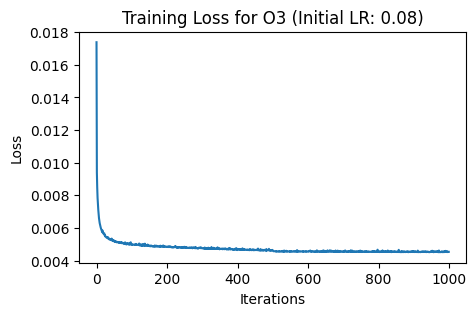

Evaluating model for pollutant: O3
Test Loss for O3: 0.0054688989583318815


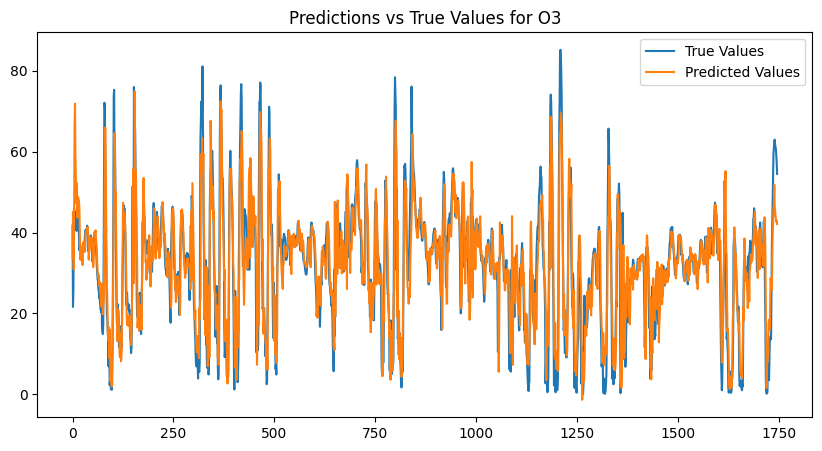

Training model for pollutant: PM2.5
Loss after iteration 0: 0.01222823996040949
Loss after iteration 100: 0.00019764500831599463
Loss after iteration 200: 0.00018242459415939338
Loss after iteration 300: 0.00017833446233369942
Loss after iteration 400: 0.000174481293310173
Loss after iteration 500: 0.00017230625385344347
Loss after iteration 600: 0.00017162563434301698
Loss after iteration 700: 0.0001713534000605189
Loss after iteration 800: 0.00017123818210188917
Loss after iteration 900: 0.00017114523085158648


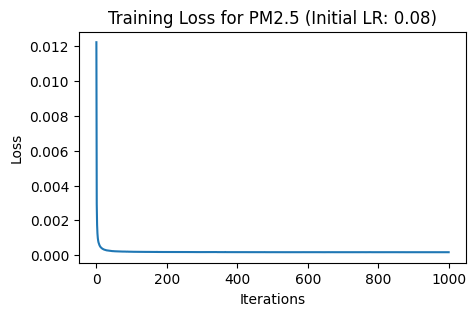

Evaluating model for pollutant: PM2.5
Test Loss for PM2.5: 0.0001759727667015765


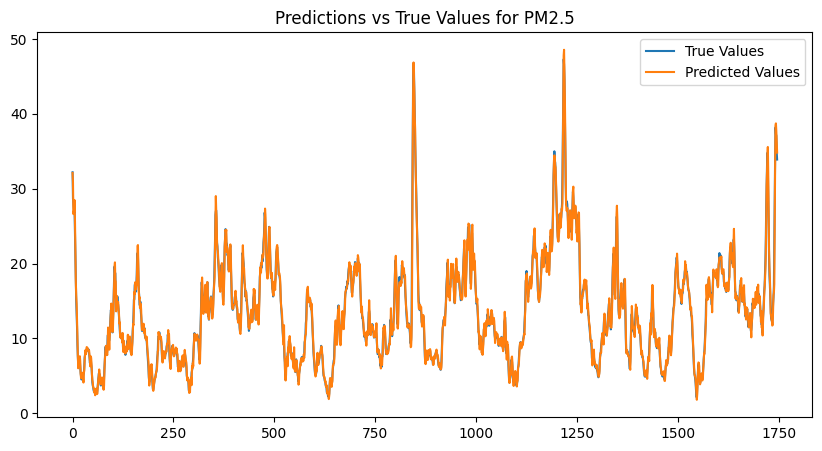

Training model for pollutant: PM10
Loss after iteration 0: 0.006819604844890038
Loss after iteration 100: 5.812686213661636e-05
Loss after iteration 200: 4.692768315385437e-05
Loss after iteration 300: 4.282688963020124e-05
Loss after iteration 400: 4.024751049275899e-05
Loss after iteration 500: 3.858111818897708e-05
Loss after iteration 600: 3.853825938463467e-05
Loss after iteration 700: 3.848771824734982e-05
Loss after iteration 800: 3.8154262665147724e-05
Loss after iteration 900: 3.8085941070719e-05


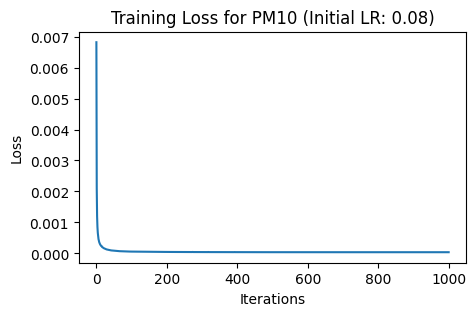

Evaluating model for pollutant: PM10
Test Loss for PM10: 3.3642484011995414e-05


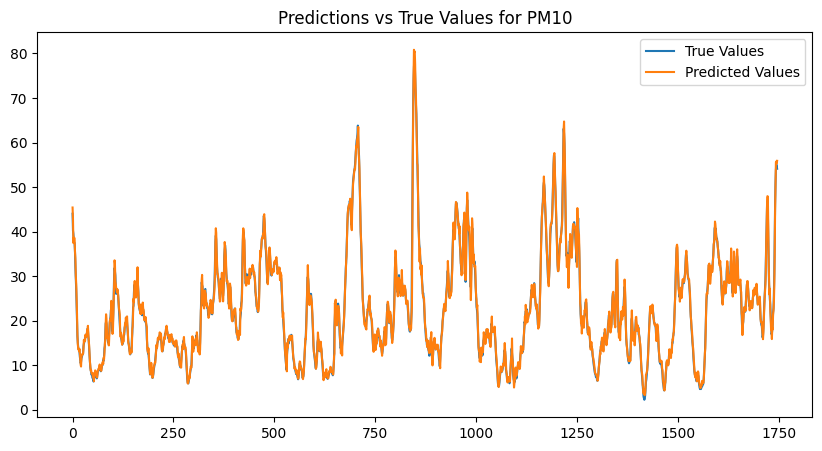

Training model for pollutant: CO
Loss after iteration 0: 0.008860439531667555
Loss after iteration 100: 0.0006141959418029899
Loss after iteration 200: 0.0005960343446043441
Loss after iteration 300: 0.0005873217339444569
Loss after iteration 400: 0.0005833210677608809
Loss after iteration 500: 0.0005811221509577702
Loss after iteration 600: 0.0005777599048470461
Loss after iteration 700: 0.0005760313329449423
Loss after iteration 800: 0.0005772075264496564
Loss after iteration 900: 0.0005774482610557838


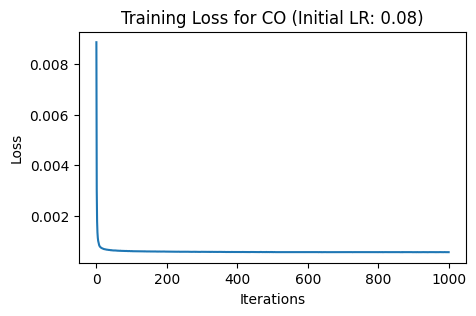

Evaluating model for pollutant: CO
Test Loss for CO: 0.0006324628408900846


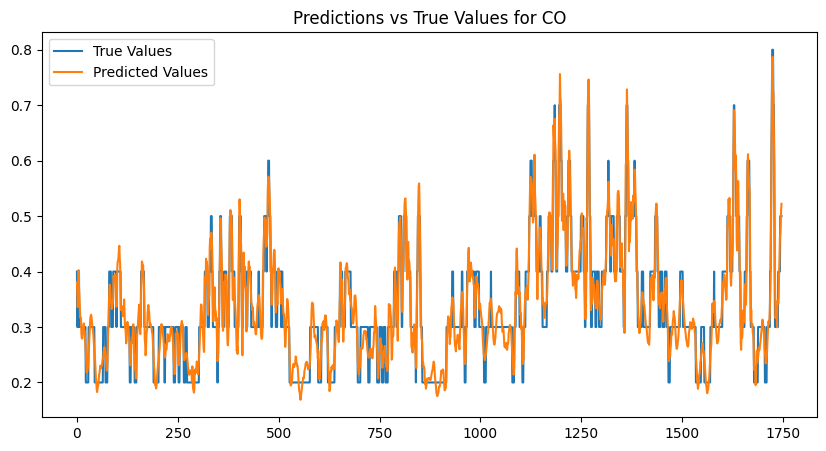

Training model for pollutant: SO2
Loss after iteration 0: 0.006893572437724523
Loss after iteration 100: 0.003121494141859544
Loss after iteration 200: 0.003046383641702365
Loss after iteration 300: 0.0030175784048102135
Loss after iteration 400: 0.0029967426812639937
Loss after iteration 500: 0.002959995980405805
Loss after iteration 600: 0.0029889394462095428
Loss after iteration 700: 0.0029960039827815117
Loss after iteration 800: 0.0029444969142118542
Loss after iteration 900: 0.002955064656958529


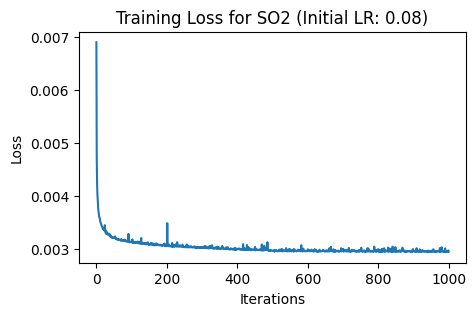

Evaluating model for pollutant: SO2
Test Loss for SO2: 0.0022751868598117615


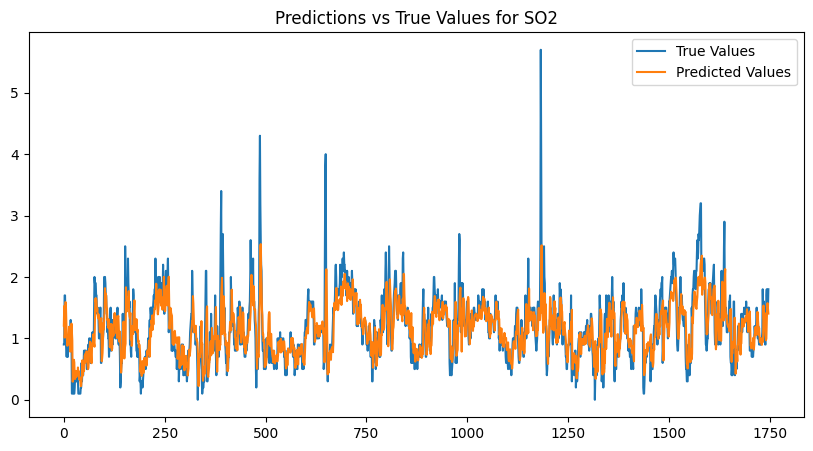

Training model for pollutant: NO2
Loss after iteration 0: 0.012051973528957746
Loss after iteration 100: 0.004384710291335303
Loss after iteration 200: 0.004259103696442465
Loss after iteration 300: 0.0041911149724218975
Loss after iteration 400: 0.004136371754141561
Loss after iteration 500: 0.004058859903003319
Loss after iteration 600: 0.004072331000474569
Loss after iteration 700: 0.004051227174015029
Loss after iteration 800: 0.004030332697668414
Loss after iteration 900: 0.0040410598369742725


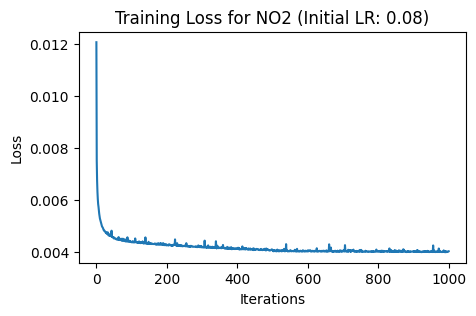

Evaluating model for pollutant: NO2
Test Loss for NO2: 0.005899028884228201


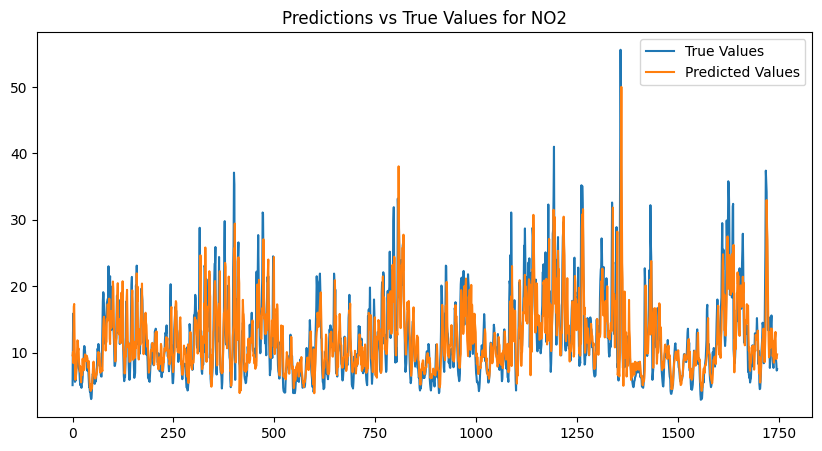

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Read the CSV file
data = pd.read_csv('dataforregression4.csv')

# Define the current value and next value columns
value_cols = ['O3', 'PM2.5', 'PM10', 'CO', 'SO2', 'NO2']
next_value_cols = ['next_O3', 'next_PM2.5', 'next_PM10', 'next_CO', 'next_SO2', 'next_NO2']

sequence_length = 24
models = {}
losses_dict = {}
history_dict = {}

for m in range(len(value_cols)):
    pollutant = value_cols[m]
    print(f"Training model for pollutant: {pollutant}")

    # Extract the current values and next values for pollutant m
    values = data[pollutant].values
    next_values = data[next_value_cols[m]].values

    # Ensure that the arrays are numpy arrays
    values = np.array(values)
    next_values = np.array(next_values)

    # Initialize lists for input features and targets
    X = []
    Y = []

    # Since next_values[i] corresponds to values[i + 1], we can only go up to len(values) - 1
    max_index = len(values) - 1  # To avoid index out of bounds

    # Prepare the input sequences and targets
    for i in range(sequence_length, max_index):
        # Input sequence: values from i - sequence_length to i - 1 (rows n-24 to n-1)
        X.append(values[i - sequence_length:i])
        # Target value: next_value at position i (which corresponds to values[i + 1])
        Y.append(next_values[i])

    X = np.array(X)
    Y = np.array(Y).reshape(-1, 1)

    # Normalize the data
    scaler_X = MinMaxScaler()
    X_scaled = scaler_X.fit_transform(X)

    scaler_Y = MinMaxScaler()
    Y_scaled = scaler_Y.fit_transform(Y)

    # Split the data
    X_train, X_test, Y_train, Y_test = train_test_split(
        X_scaled, Y_scaled, test_size=0.2, shuffle=False
    )

    # Define the neural network architecture
    layers_dims = [sequence_length, 128, 128, 1]
    activation_fn = ['relu', 'relu', 'linear']

    # Initialize the model
    model = Model(layers_dims, activation_fn, loss_function='mse')

    # Set training parameters
    learning_rate = 0.08
    num_iterations = 1000
    batch_size = 64
    print_loss = True
    print_freq = 100
    decrease_freq = 500
    decrease_proportion = 0.1

    # Train the model
    model, losses, history = train_model(
        model, X_train, Y_train,
        learning_rate=learning_rate,
        num_iterations=num_iterations,
        batch_size=batch_size,
        print_loss=print_loss,
        print_freq=print_freq,
        decrease_freq=decrease_freq,
        decrease_proportion=decrease_proportion
    )

    # Store the model and training history
    models[pollutant] = {
        'model': model,
        'scaler_X': scaler_X,
        'scaler_Y': scaler_Y
    }
    losses_dict[pollutant] = losses
    history_dict[pollutant] = history

    # Plot the loss for the current model
    plt.figure(figsize=(5, 3))
    plt.plot(losses)
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title(f'Training Loss for {pollutant} (Initial LR: {learning_rate})')
    plt.show()

    # Evaluate the model
    print(f"Evaluating model for pollutant: {pollutant}")
    AL_test = model.forward(X_test)
    Y_pred_test = scaler_Y.inverse_transform(AL_test)
    Y_true_test = scaler_Y.inverse_transform(Y_test)

    test_loss = compute_MSE_loss(AL_test, Y_test)
    print(f"Test Loss for {pollutant}: {test_loss}")

    # Plot the predictions vs. true values
    plt.figure(figsize=(10, 5))
    plt.plot(Y_true_test, label='True Values')
    plt.plot(Y_pred_test, label='Predicted Values')
    plt.title(f'Predictions vs True Values for {pollutant}')
    plt.legend()
    plt.show()


In [42]:
import numpy as np

def compute_R2(y_pred, y_true):
    """
    Computes the R-squared metric.

    Arguments:
    y_pred -- Predicted values, shape (n, 1)
    y_true -- True values, shape (n, 1)

    Returns:
    R2 score
    """
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    R2 = 1 - ss_res / ss_tot
    return R2

def compute_MAE(y_pred, y_true):
    """
    Computes the Mean Absolute Error (MAE).

    Arguments:
    y_pred -- Predicted values, shape (n, 1)
    y_true -- True values, shape (n, 1)

    Returns:
    MAE
    """
    mae = np.mean(np.abs(y_pred - y_true))
    return mae

def compute_MAPE(y_pred, y_true):
    """
    Computes the Mean Absolute Percentage Error (MAPE).

    Arguments:
    y_pred -- Predicted values, shape (n, 1)
    y_true -- True values, shape (n, 1)

    Returns:
    MAPE
    """
    # To avoid division by zero
    epsilon = 1e-10
    mape = np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100
    return mape



Evaluating model for pollutant: O3
Test data shapes for O3 - X_test: (8760, 24), Y_test: (8760, 1)
MSE on original scale for O3: 64.74935654151996


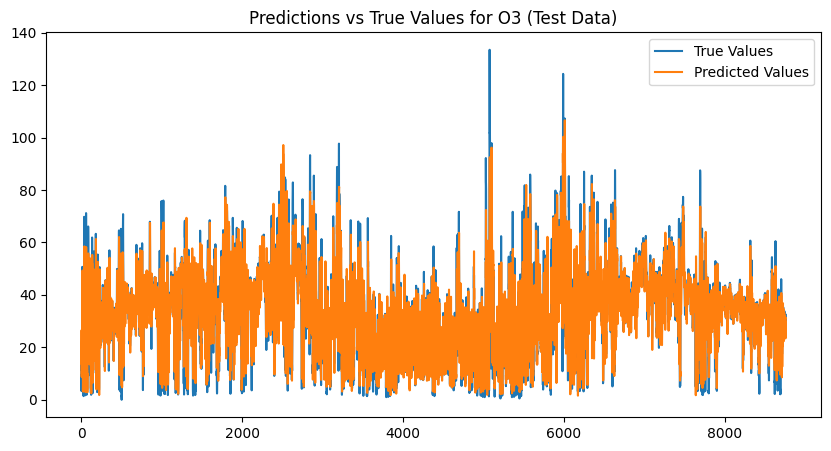


Evaluating model for pollutant: PM2.5
Test data shapes for PM2.5 - X_test: (8760, 24), Y_test: (8760, 1)
MSE on original scale for PM2.5: 0.42625532140722344


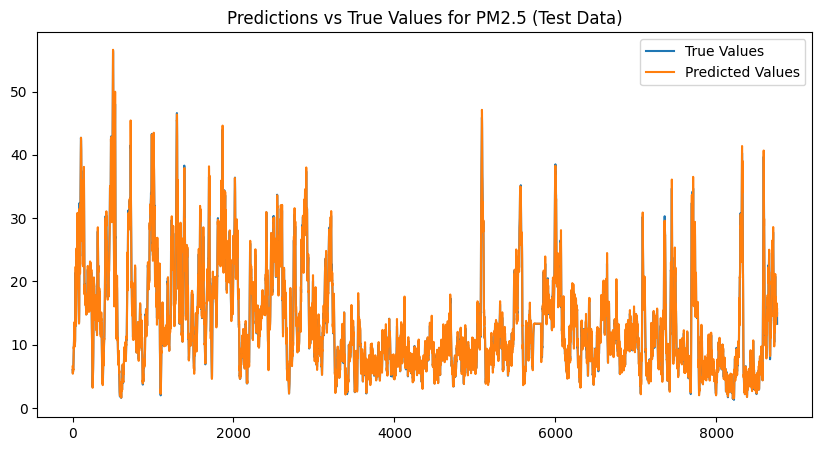


Evaluating model for pollutant: PM10
Test data shapes for PM10 - X_test: (8760, 24), Y_test: (8760, 1)
MSE on original scale for PM10: 1.1799658611160029


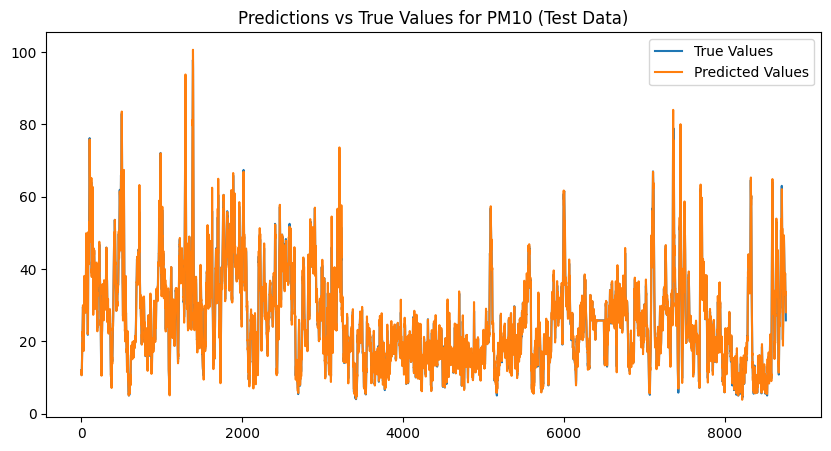


Evaluating model for pollutant: CO
Test data shapes for CO - X_test: (8760, 24), Y_test: (8760, 1)
MSE on original scale for CO: 0.0009437297608631464


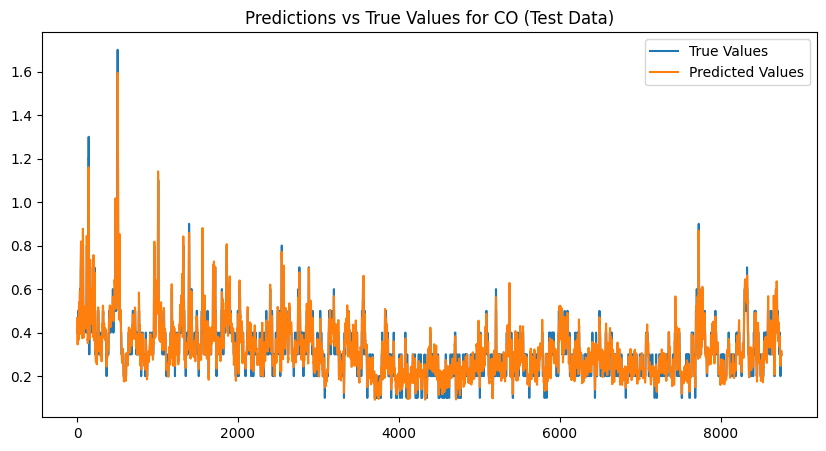


Evaluating model for pollutant: SO2
Test data shapes for SO2 - X_test: (8760, 24), Y_test: (8760, 1)
MSE on original scale for SO2: 1.0330297866285667


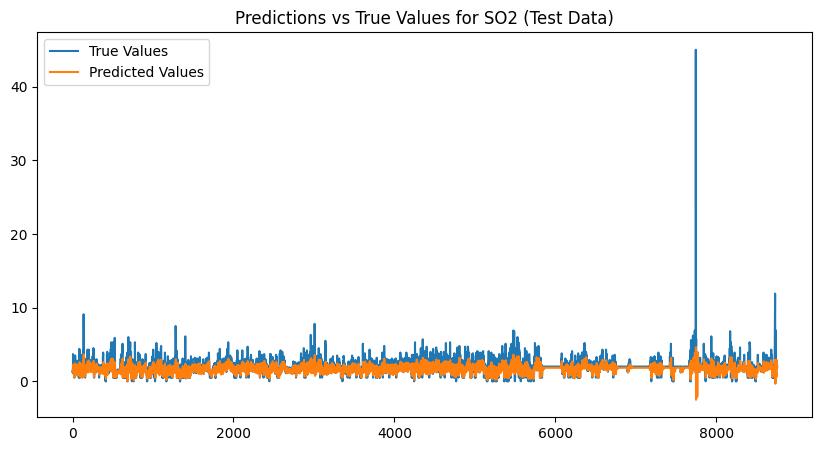


Evaluating model for pollutant: NO2
Test data shapes for NO2 - X_test: (8760, 24), Y_test: (8760, 1)
MSE on original scale for NO2: 15.672341320537145


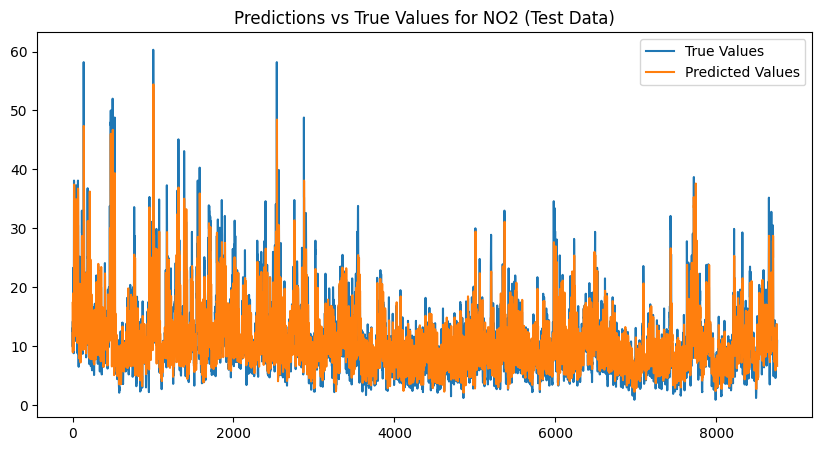

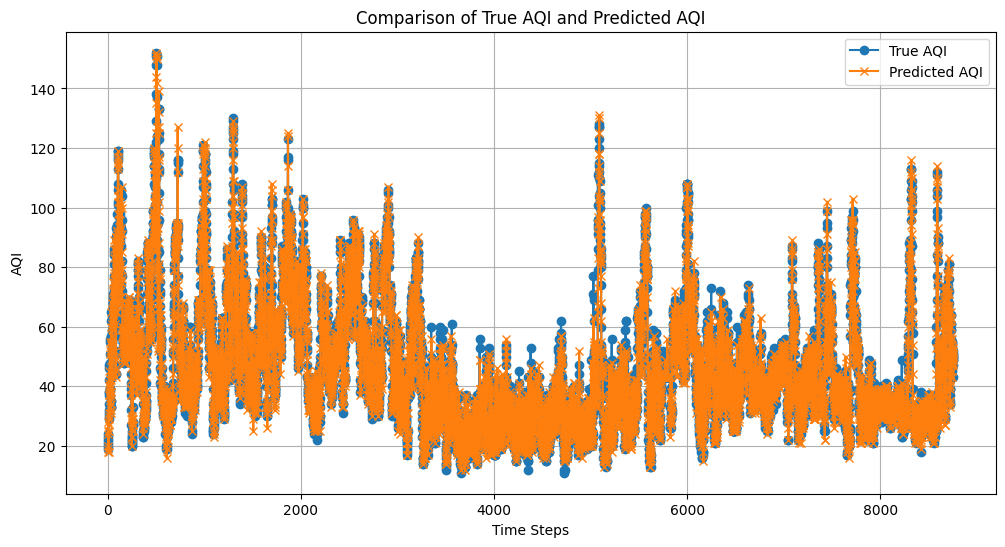

AQI MSE: 15.384018264840183
AQI MAE: 2.5385844748858446


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the test data CSV files
test_values = pd.read_csv('datafortesting_value.csv')
test_next_values = pd.read_csv('datafortesting_next_value.csv')

# Ensure that both dataframes have the same number of rows
assert len(test_values) == len(test_next_values), "Mismatch in number of rows between test values and next values."

sequence_length = 24
value_cols = ['O3', 'PM2.5', 'PM10', 'CO', 'SO2', 'NO2']

# Define the AQI calculator function
def AQI_calculator(O3, PM25, PM10, CO, SO2, NO2):
    table_of_AQI  = [0, 51, 101, 151, 201, 301, 401]
    table_of_O3  = [0, 55, 125, 165, 205, 405, 505]       # ppb
    table_of_PM25 = [0, 15.5, 35.5, 54.5, 150.5, 250.5, 350.5]  # µg/m³
    table_of_PM10 = [0, 51, 101, 255, 355, 425, 505]       # µg/m³
    table_of_CO  = [0, 4.5, 9.5, 12.5, 15.5, 30.5, 40.5]    # ppm
    table_of_SO2  = [0, 21, 76, 186, 305, 605, 805]       # ppb
    table_of_NO2  = [0, 31, 101, 361, 650, 1250, 1650]     # ppb

    O3_AQI = 0
    PM25_AQI = 0
    PM10_AQI = 0
    CO_AQI = 0
    SO2_AQI = 0
    NO2_AQI = 0
    for i in range(6):
        if table_of_O3[i] <= O3 < table_of_O3[i+1]:
            O3_AQI = table_of_AQI[i] + (O3 - table_of_O3[i]) * (table_of_AQI[i+1] - table_of_AQI[i]) / (table_of_O3[i+1] - table_of_O3[i])
        if table_of_PM25[i] <= PM25 < table_of_PM25[i+1]:
            PM25_AQI = table_of_AQI[i] + (PM25 - table_of_PM25[i]) * (table_of_AQI[i+1] - table_of_AQI[i]) / (table_of_PM25[i+1] - table_of_PM25[i])
        if table_of_PM10[i] <= PM10 < table_of_PM10[i+1]:
            PM10_AQI = table_of_AQI[i] + (PM10 - table_of_PM10[i]) * (table_of_AQI[i+1] - table_of_AQI[i]) / (table_of_PM10[i+1] - table_of_PM10[i])
        if table_of_CO[i] <= CO < table_of_CO[i+1]:
            CO_AQI = table_of_AQI[i] + (CO - table_of_CO[i]) * (table_of_AQI[i+1] - table_of_AQI[i]) / (table_of_CO[i+1] - table_of_CO[i])
        if table_of_SO2[i] <= SO2 < table_of_SO2[i+1]:
            SO2_AQI = table_of_AQI[i] + (SO2 - table_of_SO2[i]) * (table_of_AQI[i+1] - table_of_AQI[i]) / (table_of_SO2[i+1] - table_of_SO2[i])
        if table_of_NO2[i] <= NO2 < table_of_NO2[i+1]:
            NO2_AQI = table_of_AQI[i] + (NO2 - table_of_NO2[i]) * (table_of_AQI[i+1] - table_of_AQI[i]) / (table_of_NO2[i+1] - table_of_NO2[i])
    AQI = max(O3_AQI, PM25_AQI, PM10_AQI, CO_AQI, SO2_AQI, NO2_AQI)
    return int(AQI)

# Initialize dictionaries to store predicted and true values for all pollutants
pred_values_dict = {}
true_values_dict = {}

# Initialize a dictionary to store metric results
metrics_results = {}

for m in range(len(value_cols)):
    pollutant = value_cols[m]
    print(f"\nEvaluating model for pollutant: {pollutant}")

    # Extract the values and next values for pollutant m
    values = test_values[pollutant].values
    next_values = test_next_values['next_' + pollutant].values

    # Ensure that the arrays are numpy arrays
    values = np.array(values)
    next_values = np.array(next_values)

    # Check if there are enough data points to form sequences
    if len(values) < sequence_length:
        print(f"Not enough data points for pollutant {pollutant} to form sequences of length {sequence_length}. Skipping.")
        continue

    # Initialize lists for input features and targets
    X_test = []
    Y_test = []

    # Prepare the input sequences and targets
    for i in range(sequence_length, len(values)):
        # Input sequence: values from i - sequence_length to i - 1
        X_test.append(values[i - sequence_length:i])
        # Target value: next_value at position i
        Y_test.append(next_values[i])

    X_test = np.array(X_test)
    Y_test = np.array(Y_test).reshape(-1, 1)

    # Check if the shapes are correct
    print(f"Test data shapes for {pollutant} - X_test: {X_test.shape}, Y_test: {Y_test.shape}")

    # Retrieve the trained model and scalers for this pollutant
    model_info = models.get(pollutant)
    if model_info is None:
        print(f"No trained model found for pollutant {pollutant}. Skipping.")
        continue

    model = model_info['model']
    scaler_X = model_info['scaler_X']
    scaler_Y = model_info['scaler_Y']

    # Apply the same scaling to the test data
    X_test_scaled = scaler_X.transform(X_test)
    Y_test_scaled = scaler_Y.transform(Y_test)

    # Make predictions using the trained model
    AL_test = model.forward(X_test_scaled)

    # Inverse transform the predictions to get original scale
    Y_pred_test = scaler_Y.inverse_transform(AL_test)
    Y_true_test = Y_test  # Already in original scale

    # Store the predicted and true values
    pred_values_dict[pollutant] = Y_pred_test.flatten()
    true_values_dict[pollutant] = Y_true_test.flatten()

    # Compute MSE on original scale
    mse_original_scale = np.mean((Y_pred_test - Y_true_test) ** 2)
    print(f"MSE on original scale for {pollutant}: {mse_original_scale}")

    # Plot the predictions vs. true values
    plt.figure(figsize=(10, 5))
    plt.plot(Y_true_test, label='True Values')
    plt.plot(Y_pred_test, label='Predicted Values')
    plt.title(f'Predictions vs True Values for {pollutant} (Test Data)')
    plt.legend()
    plt.show()

# Create DataFrames from the dictionaries
pred_values_df = pd.DataFrame(pred_values_dict)
true_values_df = pd.DataFrame(true_values_dict)

# Ensure the DataFrames have the same length
min_length = min(len(pred_values_df), len(true_values_df))
pred_values_df = pred_values_df.iloc[:min_length]
true_values_df = true_values_df.iloc[:min_length]

# Compute the AQI for each row in the predicted and true DataFrames
pred_AQI = pred_values_df.apply(lambda row: AQI_calculator(row['O3'], row['PM2.5'], row['PM10'], row['CO'], row['SO2'], row['NO2']), axis=1)
true_AQI = true_values_df.apply(lambda row: AQI_calculator(row['O3'], row['PM2.5'], row['PM10'], row['CO'], row['SO2'], row['NO2']), axis=1)

# Plot and compare the AQI values
plt.figure(figsize=(12, 6))
plt.plot(true_AQI.values, label='True AQI', marker='o')
plt.plot(pred_AQI.values, label='Predicted AQI', marker='x')
plt.title('Comparison of True AQI and Predicted AQI')
plt.xlabel('Time Steps')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)
plt.show()

# Optionally, compute metrics for AQI
from sklearn.metrics import mean_squared_error, mean_absolute_error

aqi_mse = mean_squared_error(true_AQI, pred_AQI)
aqi_mae = mean_absolute_error(true_AQI, pred_AQI)

print(f"AQI MSE: {aqi_mse}")
print(f"AQI MAE: {aqi_mae}")


> ### Step 1: Data generation
Generate the mathematical function :  $$y = sin(2 * sin(2 * sin(2 * sin(x))))$$

In [36]:
# def generate_data(num_points=1000):

#     x = np.linspace(0.01, 11, num_points)
#     y = np.sin(2 * np.sin(2 * np.sin(2 * np.sin(x))))

#     return x.reshape(-1, 1), y.reshape(-1, 1)

> ### Step 2: Train model
Implement and train your model using the generated data.

Loss after iteration 0: 1.5275552669663452
Loss after iteration 1000: 0.05997276949726408
Loss after iteration 2000: 0.13553377404746036
Loss after iteration 3000: 0.08628708210583136
Loss after iteration 4000: 0.04672854526038071
Loss after iteration 5000: 0.03387543235299506
Loss after iteration 6000: 0.0012124421500487902
Loss after iteration 7000: 0.0007325293383522737
Loss after iteration 8000: 0.0005746623495703409
Loss after iteration 9000: 0.0004922564726610915


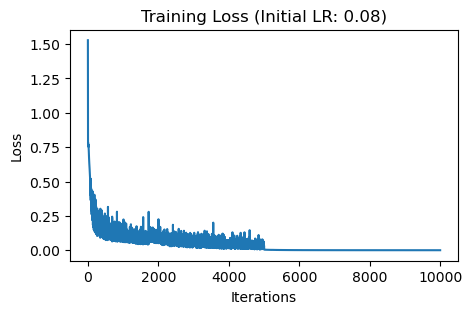

In [ ]:
# ### START CODE HERE ###
# x_train, y_train = generate_data()
# loss_function = 'mse'
# layers_dims = [1, 128, 128, 1]
# activation_fn = ['relu', 'relu', 'linear']
# learning_rate = 0.08
# num_iterations = 10000
# print_loss = True
# print_freq = 1000
# decrease_freq = 5000
# decrease_proportion = 0.1
# # You don't necessarily need to use mini_batch in this part
# batch_size = 64

# model = Model(layers_dims, activation_fn, loss_function)
# model, losses, history = train_model(model, x_train, y_train, learning_rate, num_iterations, batch_size, print_loss, print_freq, decrease_freq, decrease_proportion)
# ### END CODE HERE ###

# # Plot the loss
# plt.figure(figsize=(5, 3))
# plt.plot(losses)
# plt.xlabel('Iterations')
# plt.ylabel('Loss')
# plt.title(f'Training Loss (Initial LR: {learning_rate})')
# plt.show()

> ### Step 3: Save prediction
Save your model's predictions to:
> * *Lab4_basic_regression.csv*
> * *Lab4_basic_regression.jpg*
> * *Lab4_basic_regression.gif*

Prediction data saved as 'Lab4_basic_regression.csv'


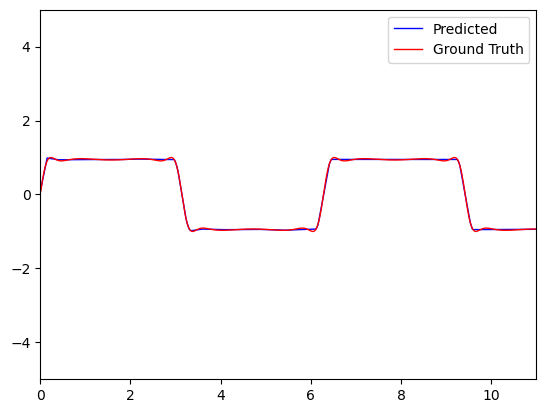

Prediction saved as 'Lab4_basic_regression.jpg'
Animation saved as 'Lab4_basic_regression.gif'


In [ ]:
save_final_result(model, x_train, y_train)
animate_training(history, x_train, y_train)